<a href="https://colab.research.google.com/github/Dntfreitas/inteligencia-artificial/blob/main/Pr%C3%A1tica/Aula/Regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação das bibliotecas necessárias

In [3]:
import pandas as pd

import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import preprocessing
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

import seaborn as sns

sns.set()

# **Passo 1**: Obter dados

Neste passo, vamos obter o conjunto de dados, e analisar as _features_. O objetivo é usar as características (i.e., _features_) das casas para predizer o valor médio das casas (expresso em centenas de milhares de dólares).



**Features:**
  - MedInc        median income in block
  - HouseAge      median house age in block
  - AveRooms      average number of rooms
  - AveBedrms     average number of bedrooms<
  - Population    block population
  - AveOccup      average house occupancy
  - Latitude      house block latitude
  - Longitude     house block longitude

In [4]:
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

In [1]:
# vamos explorar as variáveis XX e y

In [2]:
# podemos usar para detetar outliers/dados inválidos

# **Passo 2 e 3**: Pré-processamento dos dados e preparação dos dados

Vamos fazer uma análise exploratória dos dados para percebermos as _features_ de interesse.

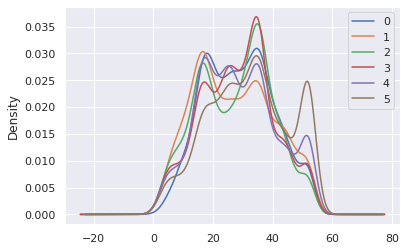

In [7]:
q = 6
feature = 'HouseAge'  #@param ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

dis_value = pd.qcut(y, q, labels=False)
df = pd.DataFrame([X[feature], dis_value]).T
ax = df[df['MedHouseVal'] == 0].plot.density(x='MedHouseVal')
for i in range(1, q):
    df[df['MedHouseVal'] == i].plot.density(x='MedHouseVal', ax=ax, label='a')

ax.legend(list(range(q)))
plt.show()

In [ ]:
# Seleção de features
feature_to_use = []

In [ ]:
# Seleção do conjunto de dados de treino e de teste (30%)
X_train, X_test, y_train, y_test = 

In [ ]:
# Feature normalization
scaler = 
X_train = 
X_test = 

# **Passo 4**: Inicialização do modelo

In [ ]:
model = 

model.add(tf.keras.Input(...))
model.add(...)
model.add(...)
model.add(...)

Compilar o modelo

In [ ]:
model.compile(...)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                250       
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2,851
Trainable params: 2,851
Non-trainable params: 0
_________________________________________________________________


# **Passo 5**: Treino do modelo

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(...)

In [ ]:
history = model.fit(...)

Epoch 1/50
159/159 [==============================] - 2s 7ms/step - loss: 1.3163 - mean_squared_error: 1.3163 - mean_absolute_percentage_error: 60.7885 - val_loss: 1.2515 - val_mean_squared_error: 1.2515 - val_mean_absolute_percentage_error: 51.7828
Epoch 2/50
159/159 [==============================] - 1s 6ms/step - loss: 1.1947 - mean_squared_error: 1.1947 - mean_absolute_percentage_error: 58.1575 - val_loss: 1.0933 - val_mean_squared_error: 1.0933 - val_mean_absolute_percentage_error: 53.8204
Epoch 3/50
159/159 [==============================] - 1s 7ms/step - loss: 1.0497 - mean_squared_error: 1.0497 - mean_absolute_percentage_error: 54.2078 - val_loss: 1.0271 - val_mean_squared_error: 1.0271 - val_mean_absolute_percentage_error: 41.5901
Epoch 4/50
159/159 [==============================] - 1s 6ms/step - loss: 0.8759 - mean_squared_error: 0.8759 - mean_absolute_percentage_error: 48.4129 - val_loss: 0.8027 - val_mean_squared_error: 0.8027 - val_mean_absolute_percentage_error: 39.6465


Curva da função de perda de treino

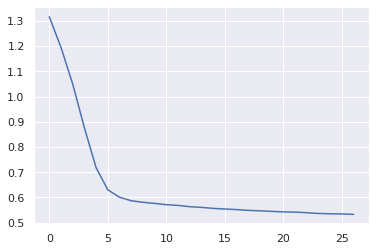

In [ ]:
plt.plot(history.history['loss'])

Curva da função de perda de validação

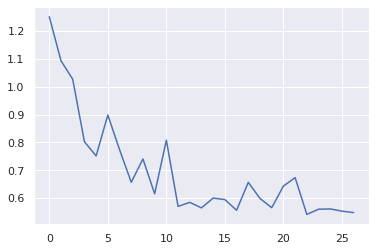

In [ ]:
plt.plot(history.history['val_loss'])

# **Passo 6**: Avaliação do modelo

In [ ]:
train_loss = model.evaluate(X_train, y_train)

452/452 [==============================] - 1s 2ms/step - loss: 0.5438 - mean_squared_error: 0.5438 - mean_absolute_percentage_error: 29.0103


In [ ]:
test_loss = model.evaluate(X_test, y_test)

194/194 [==============================] - 0s 1ms/step - loss: 0.5409 - mean_squared_error: 0.5409 - mean_absolute_percentage_error: 28.7677


In [ ]:
y_pred_train =  # cálculo das saídas

y_pred_test_prob =  # cálculo das saídas

194/194 [==============================] - 0s 1ms/step


# Exercício

Crie uma rede neuronal capaz de predizer, através das diferentes _features_, o consumo de combustível no ciclo da cidade em milhas por galão.

O conjunto de dados pode ser carregado da seguinte forma:

```python
import pandas as pd

column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']

dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', names=column_names, na_values='?', comment='\t', sep=' ', skipinitialspace=True)
```

A rede neuronal deverá possuir uma camada oculta (com 10 unidades), com a função de ativação sigmoid.

Implemente paragem antecipada no conjunto de dados de validação, com um valor de ``patience`` e de ``min_delta`` escolhidos por si. Os dados de validação deverão consistir de 20% dos dados de treino (65% de todos os dados).

Para treinar a rede, utilize um algoritmo de otimização diferente do gradiente descendente estocástico. Defina, por exemplo, ``epochs=500`` e ``batch_size=64``.

Avalie o modelo e compare-o com um modelo com mais camadas ocultas (por exemplo, 2 camadas ocultas).

**Sugestão**: Remova, do conjunto de dados, as linhas com dados inválidos. Use, por exemplo, a função ``df.dropna``.

In [ ]:
import pandas as pd

column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']

dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data',
                      names=column_names, na_values='?', comment='\t', sep=' ', skipinitialspace=True)

dataset.dropna(inplace=True)

y, X = dataset[column_names[0]], dataset[column_names[1:]]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.35)

In [ ]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.Input(shape=(X_train.shape[-1])))
model.add(tf.keras.layers.Dense(10, activation='sigmoid'))
model.add(tf.keras.layers.Dense(1, activation='linear'))

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, min_delta=0.2)

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error',
              metrics=['mean_squared_error', 'mean_absolute_percentage_error'])

In [ ]:
history = model.fit(X_train, y_train, epochs=500, batch_size=64, callbacks=[callback], validation_split=0.2)

Epoch 1/500
4/4 [==============================] - 0s 32ms/step - loss: 355.4593 - mean_squared_error: 355.4593 - mean_absolute_percentage_error: 77.1511 - val_loss: 306.3713 - val_mean_squared_error: 306.3713 - val_mean_absolute_percentage_error: 78.0779
Epoch 2/500
4/4 [==============================] - 0s 17ms/step - loss: 354.2892 - mean_squared_error: 354.2892 - mean_absolute_percentage_error: 77.0234 - val_loss: 305.3447 - val_mean_squared_error: 305.3447 - val_mean_absolute_percentage_error: 77.9569
Epoch 3/500
4/4 [==============================] - 0s 19ms/step - loss: 353.1378 - mean_squared_error: 353.1378 - mean_absolute_percentage_error: 76.8967 - val_loss: 304.3200 - val_mean_squared_error: 304.3200 - val_mean_absolute_percentage_error: 77.8361
Epoch 4/500
4/4 [==============================] - 0s 52ms/step - loss: 351.9650 - mean_squared_error: 351.9650 - mean_absolute_percentage_error: 76.7695 - val_loss: 303.2968 - val_mean_squared_error: 303.2968 - val_mean_absolute_pe

In [ ]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 39.1159 - mean_squared_error: 39.1159 - mean_absolute_percentage_error: 16.0476


[39.11591720581055, 39.11591720581055, 16.047603607177734]